<a href="https://colab.research.google.com/github/hyunjung-kim0524/DL_Study/blob/main/20240508_3_4_%EB%AA%A8%EB%8D%B8_%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 케라스에서 모델 생성 방법
#### 1. 순차모델(Sequential Model)
####    - 순차적인 층(Layers API)으로 구성돼 있고 하나의 입력층으로 시작해 하나의 출력층으로 끝내는 모델.
####    - 빠른 실험과 검증이 필요한 경우에 사용
#### 2. 함수형 API(Funcational API)
####    - 프로덕션 황경에서 주로 사용함
####    - 모델의 입출력을 함수의 형태로 구현하여 다양한 구조의 모델 구성 가능
####      (예) 이미지와 자연어 데이터를 다중 입력받아 긍정과 부정을 출력하는 분류 모델 구성
#### 3. 모델 서브클래싱(Model Subclassing)
####    - 케라스의 모델 클래스를 상속받은 후 사용자가 세부적인 동작을 직접 수정해 구현할 수 있는 방법

순차모델

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [2]:
from tensorflow.keras import Input

model = Sequential()

model.add(Input(shape=(28,28)))
model.add(Dense(32, activation = 'relu', name = 'layer1'))
model.add(Dense(16, activation = 'relu', name = 'layer2'))
model.add(Dense(10, activation = 'softmax', name = 'layer3'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 28, 32)            928       
                                                                 
 layer2 (Dense)              (None, 28, 16)            528       
                                                                 
 layer3 (Dense)              (None, 28, 10)            170       
                                                                 
Total params: 1626 (6.35 KB)
Trainable params: 1626 (6.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


함수형 API

In [3]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

input = Input(shape=(784,))
x=Dense(units = 32, activation = 'relu')(input)
x=Dense(units = 16, activation = 'relu')(x)
output = Dense(units = 10, activation = 'softmax')(x)

model = Model(inputs = input, outputs = output, name = 'mnist')
model.summary()

Model: "mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 25818 (100.85 KB)
Trainable params: 25818 (100.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


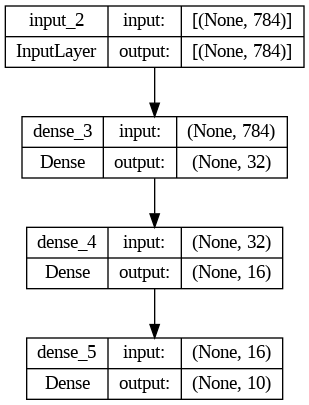

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model, "mnist-model.png", show_shapes = True)

모델 함수화 하기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim = 784))
  model.add(Dense(16, activation='rule'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'],
  )
  return model

  model=get_model()
  model.summary()
